## Training and Testing Models for Lead Scoring

#### - Import and Clean Data
###  - Convert Categorical Values to Numeric
###  - Exploratory Data Analysis
###  - Model Testing and Evaluation

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


## Import Data and Remove Irrelevant Features

In [3]:
path = "C:\\Users\\HannahNevel\\Downloads\\archive\\Lead Scoring.csv"
lead_data = pd.read_csv(path, delimiter=",")
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [5]:
lead_data.drop(columns =['What matters most to you in choosing a course', 'Magazine','Newspaper Article','X Education Forums','Newspaper',\
    'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Asymmetrique Activity Index',\
        'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Specialization', 'Search', 'Lead Profile', 'Lead Quality', 'Tags', 'Last Notable Activity'\
            ,'Country', 'City'], inplace = True)


In [23]:
lead_data.rename(columns = {'Total Time Spent on Website':'Total Time Spent on Website (min)'}, inplace = True)
lead_data['Total Time Spent on Website (min)'] = lead_data['Total Time Spent on Website (min)'].div(60)
lead_data


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website (min),Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0.000000,0.00,Page Visited on Website,Select,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,0.187222,2.50,Email Opened,Select,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,0.425556,2.00,Email Opened,Select,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,0.084722,1.00,Unreachable,Word Of Mouth,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,0.396667,1.00,Converted to Lead,Other,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,0.512500,2.67,Email Marked Spam,Select,Unemployed
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,0.066111,2.00,SMS Sent,Select,Unemployed
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,0.055278,2.00,SMS Sent,Select,Unemployed
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,0.138611,3.00,SMS Sent,Online Search,NaN


In [34]:
lead_data.interpolate(method ='linear', limit_direction ='forward', inplace =True)

In [38]:
lead_data.fillna(method='bfill', inplace = True)

In [39]:
print(lead_data.isnull().sum())

Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Lead Source                           0
Do Not Email                          0
Do Not Call                           0
Converted                             0
TotalVisits                           0
Total Time Spent on Website (min)     0
Page Views Per Visit                  0
Last Activity                         0
How did you hear about X Education    0
What is your current occupation       0
dtype: int64


## Encode Categorical Variables to Numerical for Modeling 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
lead_sources = np.unique(lead_data['Lead Source'].astype(str))

In [ ]:
col_headers = lead_data.columns.values
X = lead_data[col_headers].values
lead_origins = np.unique(lead_data['Lead Origin'])
DoNotEmails = np.unique(lead_data['Do Not Email'])
DoNotCalls = np.unique(lead_data['Do Not Call'])
Countries = np.unique(lead_data['Country'].astype(str))
Cities = np.unique(lead_data['City'].astype(str))
Occupations = np.unique(lead_data['What is your current occupation'].astype(str))
heard_abouts = np.unique(lead_data['How did you hear about X Education'].astype(str))

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)



In [11]:
lead_data.dtypes

Prospect ID                            object
Lead Number                             int64
Lead Origin                            object
Lead Source                            object
Do Not Email                           object
Do Not Call                            object
Converted                               int64
TotalVisits                           float64
Total Time Spent on Website (min)     float64
Page Views Per Visit                  float64
Last Activity                          object
How did you hear about X Education     object
What is your current occupation        object
dtype: object

In [13]:
encoded_lead_data = MultiColumnLabelEncoder(columns = ['Lead Origin','Lead Source','Do Not Email', 'Do Not Call','Last Activity',\
    'How did you hear about X Education','What is your current occupation']).fit_transform(lead_data)

## Exploratory Data Analysis

In [14]:
encoded_lead_data.corr()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website (min),Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation
Lead Number,1.000000,0.004194,0.075424,-0.098529,0.011913,0.025157,0.022223,0.020329,0.058808,-0.074901,-0.012940,0.049471
Lead Origin,0.004194,1.000000,0.091317,0.053296,0.006909,0.223725,0.085354,0.088852,0.156455,0.108448,-0.261804,-0.182637
Lead Source,0.075424,0.091317,1.000000,-0.031846,0.010122,0.180602,-0.153861,-0.232634,-0.251645,0.117301,0.040460,-0.015858
Do Not Email,-0.098529,0.053296,-0.031846,1.000000,-0.004322,-0.135580,0.033842,-0.046374,0.033582,-0.038383,0.071147,0.034835
Do Not Call,0.011913,0.006909,0.010122,-0.004322,1.000000,0.018581,0.003221,0.006801,-0.005918,-0.003161,-0.017383,-0.009691
Converted,0.025157,0.223725,0.180602,-0.135580,0.018581,1.000000,0.030395,0.362483,-0.003328,0.247075,-0.222737,-0.231565
TotalVisits,0.022223,0.085354,-0.153861,0.033842,0.003221,0.030395,1.000000,0.221240,0.512125,0.059777,-0.109188,-0.049249
Total Time Spent on Website (min),0.020329,0.088852,-0.232634,-0.046374,0.006801,0.362483,0.221240,1.000000,0.320361,0.086314,-0.164641,-0.119172
Page Views Per Visit,0.058808,0.156455,-0.251645,0.033582,-0.005918,-0.003328,0.512125,0.320361,1.000000,0.062049,-0.167852,-0.071616
Last Activity,-0.074901,0.108448,0.117301,-0.038383,-0.003161,0.247075,0.059777,0.086314,0.062049,1.000000,-0.064634,-0.042727


In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Conversion Rate')

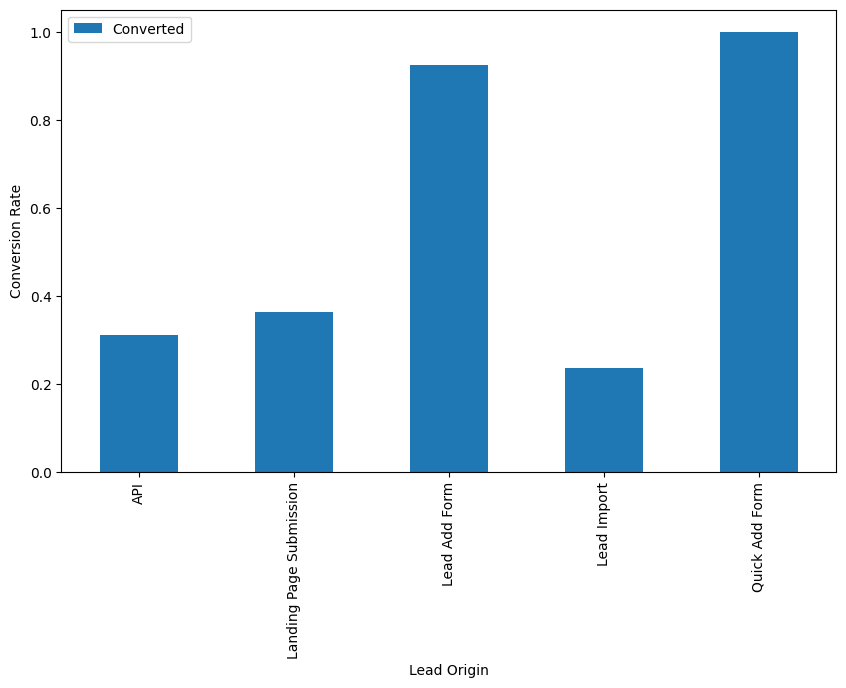

In [16]:
LeadOrigin_group = lead_data[['Lead Origin','Converted']]
LeadOrigin_group = LeadOrigin_group.groupby(['Lead Origin'],as_index=False).mean()

LeadOrigin_group.plot(kind='bar', x = 'Lead Origin', figsize=(10, 6))

plt.xlabel('Lead Origin')
plt.ylabel('Conversion Rate') 

Text(0, 0.5, 'Conversion Rate')

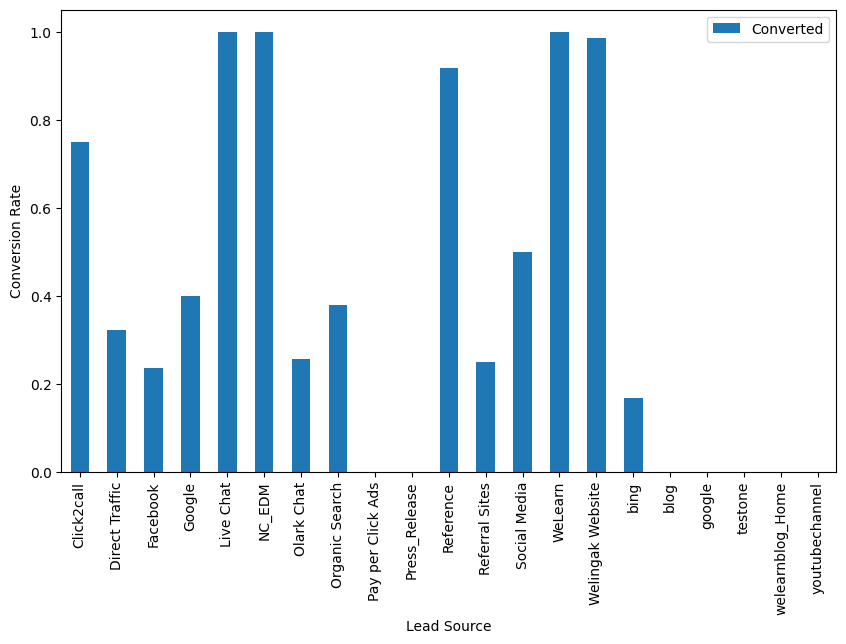

In [17]:
LeadSource_group = lead_data[['Lead Source','Converted']]
LeadSource_group = LeadSource_group.groupby(['Lead Source'],as_index=False).mean()

LeadSource_group.plot(kind='bar', x = 'Lead Source', figsize=(10, 6))

plt.xlabel('Lead Source')
plt.ylabel('Conversion Rate') 

<AxesSubplot:xlabel='Total Time Spent on Website (min)', ylabel='Last Activity'>

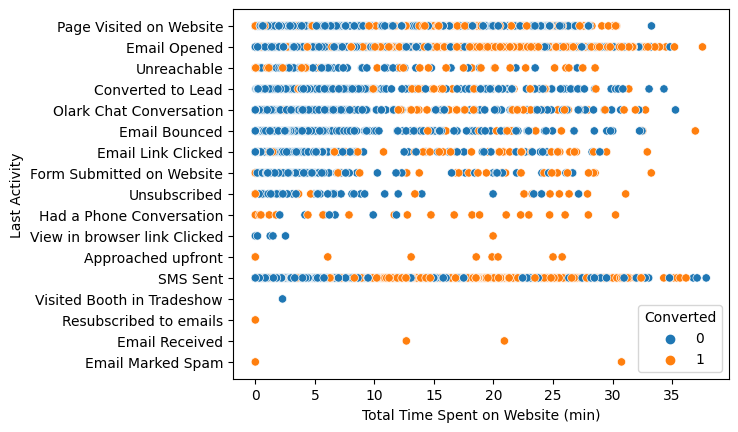

In [18]:
sns.scatterplot(data=lead_data, y='Last Activity',x='Total Time Spent on Website (min)',hue='Converted')

## Model Training and Testing

In [54]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Converted', 'Converted']); ax.yaxis.set_ticklabels(['Not Converted', 'Converted']) 
    plt.show() 

In [40]:
Y = lead_data['Converted'].to_numpy()
Y

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [95]:
X = encoded_lead_data[['Lead Origin', 'Lead Source','Last Activity', 'Total Time Spent on Website (min)', 'How did you hear about X Education','What is your current occupation']]
X.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'Total Time Spent on Website (min)',
       'How did you hear about X Education',
       'What is your current occupation'],
      dtype='object')

In [44]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)

In [49]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10).fit(X_train, Y_train)

In [50]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7577067256701897


In [51]:
logreg_cv.score(X_test, Y_test)

0.7581168831168831

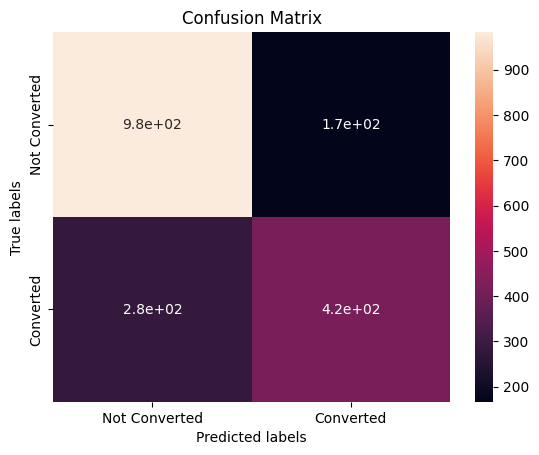

In [55]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [59]:
tree_cv = GridSearchCV(tree, parameters, cv =10).fit(X_train, Y_train)

In [60]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8135804410635263


In [61]:
tree_cv.score(X_test, Y_test)

0.8257575757575758

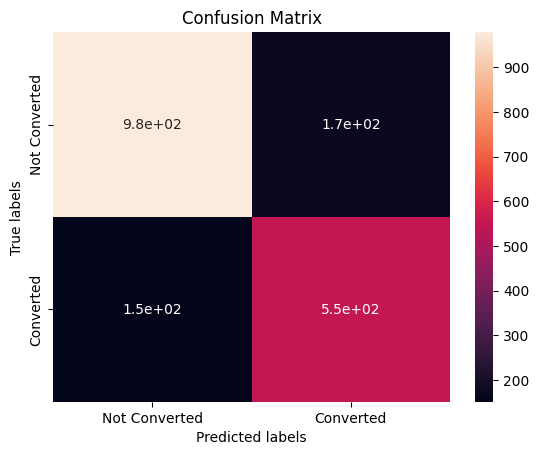

In [62]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


In [86]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [67]:
y_pred = rf.predict(X_test)

In [69]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7775974025974026


In [81]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021FF08408E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021FF0815E80>})

In [82]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 329}


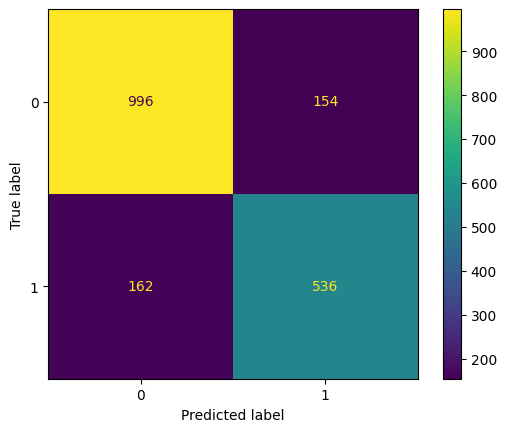

In [84]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

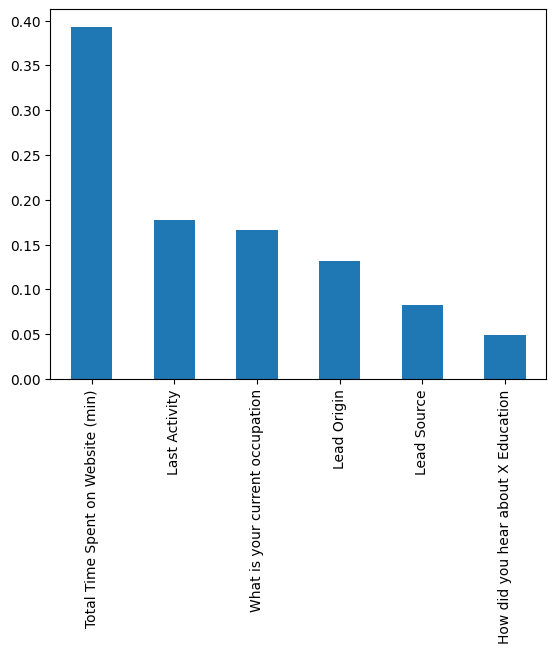

In [96]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [99]:
params_tuned = {'max_depth': 6, 'n_estimators': 329}

# Create a random forest classifier
rf2= RandomForestClassifier(n_estimators = 329, max_depth= 6)


rf2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, n_estimators=329)

In [101]:
y_pred2 = rf2.predict(X_test)

In [102]:
accuracy = accuracy_score(Y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.8268398268398268


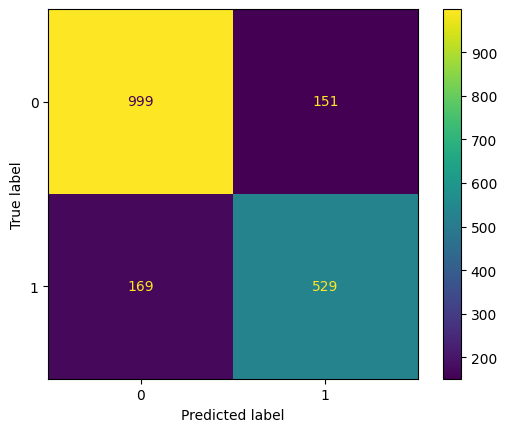

In [103]:
cm2 = confusion_matrix(Y_test, y_pred2)

ConfusionMatrixDisplay(confusion_matrix=cm2).plot();